# Stability, Implicit v Explicit Schemes, Order of Accuracy by Experiment

You can assess the accuracy of a numerical method by methods other than comparing it with the Taylor Series. 

Just subtract the numerical solution from the analytic solution (i.e. obtain the error) and find the errors for a variety of mesh sizes. The error will go as that certain order.

That's it tbh p simple

## Stability

This is an important concept that is different from global order accuracy. It is the property of a certain numerical method. It is called 'stable' if it does not magnify errors, while it is instable if it does magnify it.

Generally one finds out whether a method is stable by analysing whether the numerical method generates a numerical solution that __preserves__ certain features of the analytic solution, whether we know that solution or not. From the lectures, this seems to be done on a case-by-case basis.

For example, for gravitational interactions, any numerical scheme should be time reversible, even though N-body problems generally do not have analytic solutions.

Anyways, there are 2 types of errors: __Truncation Errors__ which is what we looked at before wheere we truncated the Taylor series, and  __Round-off Errors__ where computers must round real numbers to a float. 

We want these errors to remain small and not get magnified each step.

Let's look at an example. Consider the following ODE:

$\frac{du}{dt}=-\sigma u$

where $\sigma>0$ and $\sigma \in \mathbb{R}$

We know that analytically, an increment from $t_n$ to $t_{n+1}$ is exactly:

$u(t_{n+1})=e^{-\sigma * \delta t}u(t_n)$

We shall define the Amplication Factor $\lambda$ as:

$\lambda = \frac{u_{n+1}}{u_n}$

For the explicit forward Euler Scheme the Amplication factor is

$\lambda = 1-\sigma \delta t$

In the same way that we know that a solution to gravitational interactions must be time reversible, we will impose some certain constraints on our numerical scheme that preserves key features of the analytic solution.

Slyz proposes two possible conditions:

1. $\lambda \geq 0$
2. for all n, $|\lambda|^n < m$ where $m$ is a positive, finite, real number

The reasons for these conditions are (respectively):

1. Ensures that the solution is always positive
2. Ensures that that any point of the solution ($u_n$) is bounded (i.e. finite)

Solving for $\delta t$ wrt these conditions on the Amplication Factor we get these conditions:

1. $\delta t \leq \frac{1}{\sigma}$
2. If we take $n\rightarrow \infty$, then $\delta t<\frac{2}{\sigma}$

Fulfilling these requirements means that the Explicit Forward Euler Scheme is __Conditionally Stable__

We can get around this by considering an implicit scheme. The implicit Euler scheme is the same, but instead we evaluate $f(x,t)$ at the end of the step.

So Explicit is:

$x_{k+1}=x_k+f(x_k,t_k)\delta t$

While Implicit is:

$x_{k+1}=x_{k}+f(x_{k+1},t_{k+1})\delta t$


Solving for all knowns on one side gives

$x_{k+1}=\frac{1}{1+\sigma \delta t}x_k$

So the amplification factor is

$\lambda = \frac{1}{1+\sigma \delta t}$

which is less than 1 for ALL non-zero values of the timestep. Thus this scheme is __unconditionally stable__. 

Let's now try this for $\sigma=1$

Therefore we have 2 stability conditions for $\delta t$

1. $\delta t \leq 1$
2. $\delta t < 2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

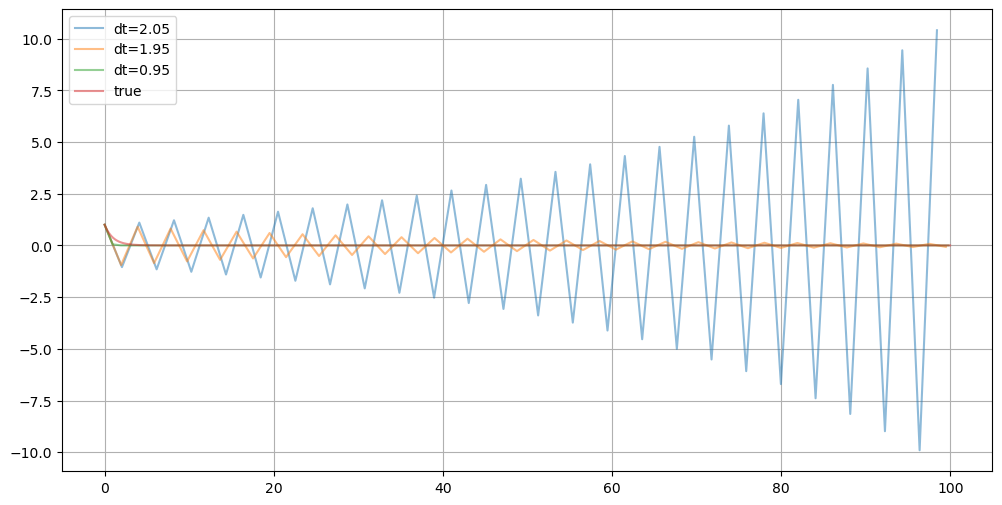

In [7]:
#Use fct from before
def Expl_Euler(f,x0,t):
    #Function to solve an ODE x'=f(x,t) for the initial condition x=x0 at t=t[0] using the Explicit Forward Euler Method
    #f = function of x and t (x in first input, t in second input) that is equal to the derivative (Lambda Function)
    #x0 = x value at t=t[0] (float)
    #t = grid spacing of t. This function assumes that t has a constant difference between each adjacent element (i.e. deltat is constant) (1D numpy array)
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method(1D numpy array)
    dt=t[1]-t[0] #Create grid step
    x=np.zeros(len(t)) #Create numpy array of x
    x[0]=x0 #set initial condition
    for k in range(1,len(t)): #Loop for each t point
        x[k]=x[k-1]+f(x[k-1],t[k-1])*dt #Apply Euler Scheme
    
    return x

st=0
et=100

tu=np.arange(st,et,2.05)
ts=np.arange(st,et,1.95)
tss=np.arange(st,et,0.95)
tt=np.arange(st,et,0.05)

xu=Expl_Euler(lambda x,t: -x, 1, tu)
xs=Expl_Euler(lambda x,t: -x, 1, ts)
xss=Expl_Euler(lambda x,t: -x, 1, tss)
xt=np.exp(-tt)

figure=plt.figure(figsize=(12,6))
plt.plot(tu,xu,alpha=0.5,label = 'dt=2.05')
plt.plot(ts,xs,alpha=0.5,label = 'dt=1.95')
plt.plot(tss,xss,alpha=0.5,label = 'dt=0.95')
plt.plot(tt,xt,alpha=0.5,label = 'true')
plt.legend()
plt.grid()

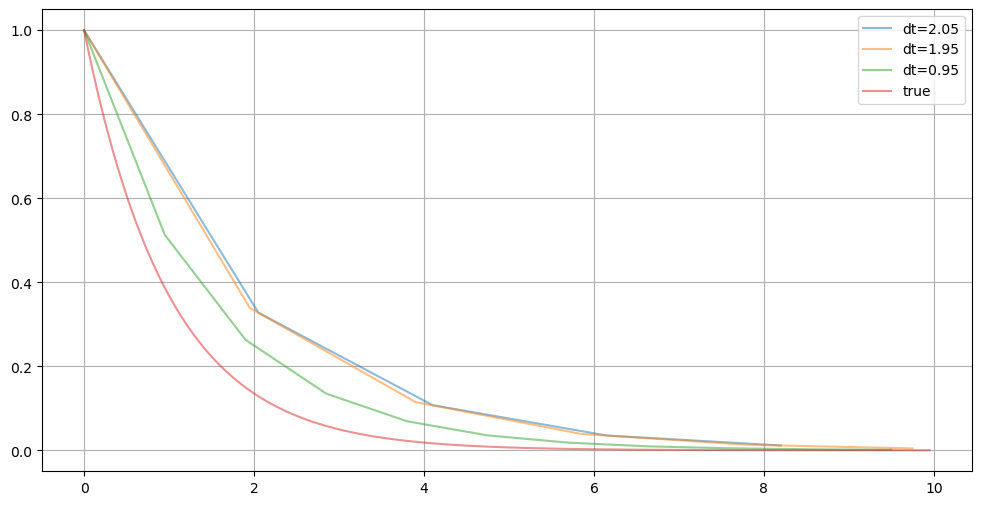

In [10]:
#Now use implicit Euler Scheme

def Implicit_Forward_Euler_exp(x0,t):
    #Solves the differential equation x'=-x using the Implicit Euler Scheme
    dt=t[1]-t[0]
    x=np.zeros(len(t))
    x[0]=x0
    for k in range(1,len(t)):
        x[k]=x[k-1]/(1+dt)
    return x

st=0
et=10

tu=np.arange(st,et,2.05)
ts=np.arange(st,et,1.95)
tss=np.arange(st,et,0.95)
tt=np.arange(st,et,0.05)

xu=Implicit_Forward_Euler_exp(1, tu)
xs=Implicit_Forward_Euler_exp(1, ts)
xss=Implicit_Forward_Euler_exp(1, tss)
xt=np.exp(-tt)

figure=plt.figure(figsize=(12,6))
plt.plot(tu,xu,alpha=0.5,label = 'dt=2.05')
plt.plot(ts,xs,alpha=0.5,label = 'dt=1.95')
plt.plot(tss,xss,alpha=0.5,label = 'dt=0.95')
plt.plot(tt,xt,alpha=0.5,label = 'true')
plt.legend()
plt.grid()